# Problem Set 5: Algorithms in Qiskit

## Instructions for the problem set

Please submit both submit a pdf copy as well as the ipynb file of your notebook. The pdf can be obtained via the option of File/Print Preview.

If you have worked on the server, you can take the following steps to download your notebook:
1) Go to myadroit.princeton.edu and enter your login credentials.

2) Go to Files/Home Directory

3) You should see a user interface that displays your home directory and your .ipynb file should also be in that directory. You can use the download option to dowload the file to your computer.

Feel free to let us know with any technical difficulties.

This notebook is created by:

Chris Phenicie: phenicie@princeton.edu

Tuna Uysal:     muysal@princeton.edu

and modified by Frank Zhang

Finally, please refer to the Qiskit Tutorial for instruction on the syntax for defining registers, quantum circuits, applying gates and performing measurements.

In [1]:
'''Some generic python and jupyter imports'''
import numpy as np
from numpy import pi,sqrt


'''Qiskit imports'''
from qiskit import(
    QuantumCircuit
    , execute
    , Aer
    , ClassicalRegister
    , QuantumRegister
)
backend_svec = Aer.get_backend('statevector_simulator')
backend_qasm = Aer.get_backend('qasm_simulator')

from qiskit.visualization import plot_histogram

In [2]:
# make sure to run these functions to use in the Problem 2!

def dot_mod_2(b, z):
    """ Take the dot product mod two of two bit strings b and z 
    
    Args:
        b (str): A binary bit string
        z (str): A binary bit string with the same length as b
        
    Returns:
        (int): The dot product mod 2 of b and z
    """
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

# basic example
b = '10'
z = '01'
print('Dot product of {0} and {1}:'.format(b,z))
print(dot_mod_2(b, z))

def num_to_bin_str(num, length_of_str):
    """ Return the binary string representation of a number 
    
    Args:
        num (int): the number to convert to a binary string
        length_of_str (int): the length of the string
        
    Returns:
        (str) the representation of num in binary
    """
    
    return format(num, '0%ib' %length_of_str)

# basic example
decNumber = 3
nBits = 6
print('Binary representation of {0} using {1} bits:'.format(decNumber,nBits))
print(num_to_bin_str(decNumber, nBits)) # Write the number 3 in binary, with leading zeros to make the total string length 6

Dot product of 10 and 01:
0
Binary representation of 3 using 6 bits:
000011


# Problem 1: Deutsch-Jozsa

In this problem, we will implement and test the Deutsch-Jozsa algorithm for two functions of the form $f:\{0,1\}^3\rightarrow\{0,1\}$, which takes a bitstring of length three as input and outputs either 0 or 1 for each of the inputs. The functions that we will consider are either constant (same output for all inputs) or balanced (output 0 for half the inputs and 1 for the remaining half). Applying the Deutsch-Jozsa algorithm on these functions will let us determine the type of function.

Let us go over the implementation in parts, starting with the initialization of the qubits in our circuit. For the function described above, how many qubits do you need in total for your circuit?

Four qubits

At the start of the algorithm all qubits need to be initialized to $|0\rangle$ except for the last one, which should be initialized to $|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$. Implement a circuit below that is initialized as such. Note that all qubits are initialized to $|0\rangle$ by default in Qiskit.

/Users/princetonwork/anaconda3/envs/pset_env/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


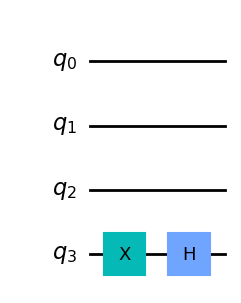

In [3]:
from qiskit.circuit.library import HGate
# You have two options to initialize your last qubit
# 1) use the initialize() function as described in the tutorial
# 2) apply the correct gate(s) to transfer it from |0> to |->
# number of input bits of our function
n = 3
# enter the correct total number of qubits for the circit
size = 4
# create a quantum register with the appropriate number of qubits
q = QuantumRegister(size,'q')
# create a quantum circuit using the register
qc_init = QuantumCircuit(q)
# use initialize() or apply appropriate gate(s) for the last qubit below
qc_init.x(3)
qc_init.append(HGate(),[3])



# draw the circuit
qc_init.draw('mpl')

After we have initialized our state, we will apply a set of Hadamard gates to create an equal superposition of the three qubit inputs to the quantum oracle.

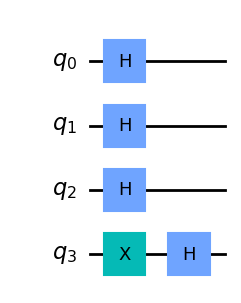

In [4]:
# iterate over the input qubits, applying the Hadamard gate to each
for i in range(n):
    qc_init.h(q[i])

# draw the circuit
qc_init.draw('mpl')

Now, we are ready to use an oracle function! First, we will need to define it. For a binary function $f:\{0,1\}^n\rightarrow\{0,1\}$ with $n$ input bits and 1 output bit, the quantum oracle should perform the following action:

$$
U_f:|x\rangle|y\rangle\rightarrow |x\rangle|y\oplus f(x)\rangle
$$

Note that both y and f(x) are single bits for this function.

In this part, implement two oracles corresponding to the constant and balanced functions, $f_c(x)$ and $f_b(x)$ defined below.

The constant function, $f_c(x)$, gives 1 for all three bit inputs $x$.

| $x$ | $$f_c(x)$$ |
|-|-|
| 000 | 1 |
| 001 | 1 |
| 010 | 1 |
| 011 | 1 |
| 100 | 1 |
| 101 | 1 |
| 110 | 1 |
| 111 | 1 |

The truth table for the balanced function, $f_b(x)$, is defined below.

| $x$ | $$f_b(x)$$ |
|-|-|
| 000 | 1 |
| 001 | 0 |
| 010 | 1 |
| 011 | 0 |
| 100 | 0 |
| 101 | 1 |
| 110 | 0 |
| 111 | 1 |

Using X and CNOT operations, form the corresponding quantum oracles. To be clear, we are only asking you to implement it for the functions defined above and not for any arbitrary function!

Hint: You might find it helpful to consider the effect of flipping one bit on the output or to write down the truth table for the unitary operation.

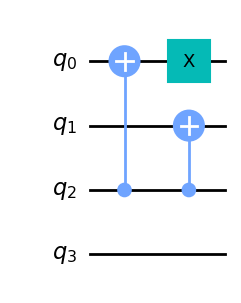

In [5]:
# we will define the quantum oracles in a new circuit and later add it to the previous circuit

# implement the constant oracle defined above

# create a quantum circuit using the register
constant_oracle = QuantumCircuit(q)

# apply the appropriate gates to implement the constant oracle below

constant_oracle.cx(2,0)
constant_oracle.x(0)
constant_oracle.cx(2,1)


constant_oracle.draw('mpl')

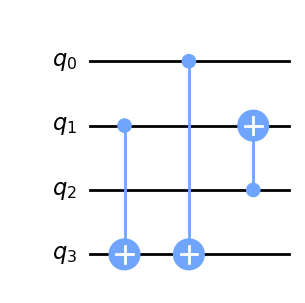

In [6]:
# implement the balanced oracle defined above

# create a quantum circuit using the register
balanced_oracle = QuantumCircuit(q)

# apply the appropriate gates to implement the balanced oracle below
balanced_oracle.cx(1,3)
balanced_oracle.cx(0,3)
balanced_oracle.cx(2,1)

balanced_oracle.draw('mpl')

Now let us also define the last block of the circuit, which includes another set of Hadamard gates followed by measurement.  Here we will need to add a 3-bit classical register to read out the qubit states at the end.

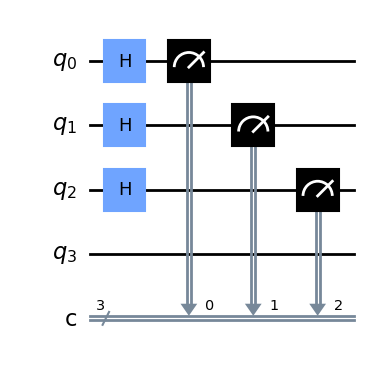

In [7]:
# let us form our classical register of 3 bits
c = ClassicalRegister(n,'c')

# we pass both the quantum register q and the classical register c as arguments for the last part of the circuit
qc_end = QuantumCircuit(q,c)

# add Hadamard gates to the first n qubits
for i in range(n):
    qc_end.h(q[i])
    
# measure each of the first n qubits and store the information in the corresponding classical register
qc_end.measure(q[0],c[0])
qc_end.measure(q[1],c[1])
qc_end.measure(q[2],c[2])

qc_end.draw('mpl')

Now we are ready to finish and test each circuit. Let us start with the constant oracle.

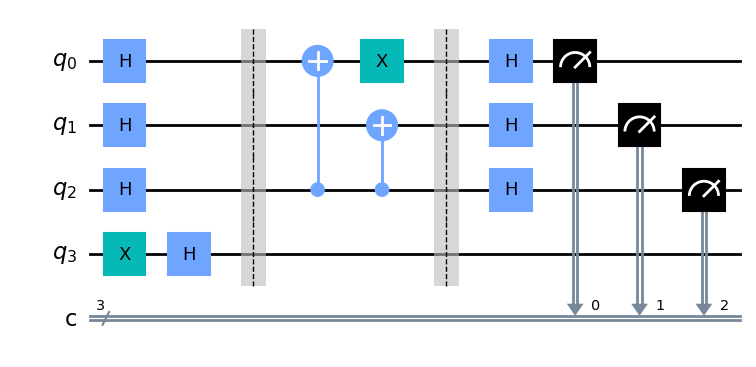

In [8]:
constant_full_circuit = QuantumCircuit(q,c)
# add on the first part of the circuit
constant_full_circuit = constant_full_circuit.compose(qc_init)
# add a barrier for visual clarity (no effect on the code)
constant_full_circuit.barrier()
# add on the constant oracle
constant_full_circuit = constant_full_circuit.compose(constant_oracle)
# add a barrier for visual clarity
constant_full_circuit.barrier()
# add on the final part of the circuit
constant_full_circuit = constant_full_circuit.compose(qc_end)

constant_full_circuit.draw('mpl')

What is the minimum number of times you need to execute this circuit in order to infer whether your function is constant or balanced?

To know the parity of an n-bit input string, you need n/2 queries, in this n equals two, so the minimum number of queries is 1.

Run the constant oracle circuit.

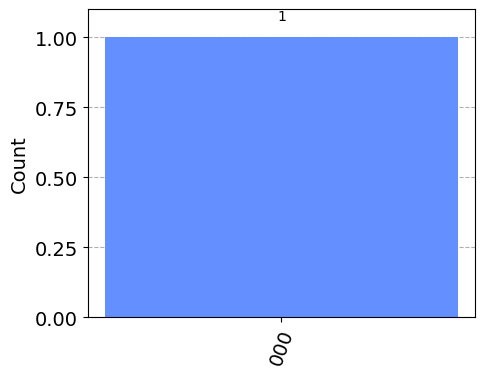

In [9]:
# enter the minimum number of trials needed
nShots = 1

# perform constant_full_circuit just 1 time and plot the histogram of states!
res = execute(constant_full_circuit, backend_qasm,shots=nShots).result()
counts = res.get_counts();
plot_histogram(counts, figsize=(5,4))

Is your result consistent with $f_c(x)$?

Given the measurment returned ket[0,0,0], this indicates that the measure is constant, hence consistent with fc(x).

Now implement and execute the circuit with the balanced oracle.

/Users/princetonwork/anaconda3/envs/pset_env/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


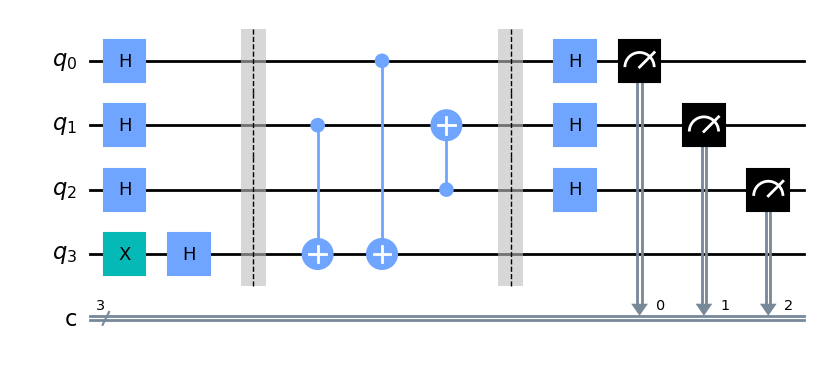

In [10]:
# implement your balanced oracle circuit using the parts defined earlier below
balanced_full_circuit = QuantumCircuit(q,c)

balanced_full_circuit = balanced_full_circuit.compose(qc_init)

balanced_full_circuit.barrier()

balanced_full_circuit = balanced_full_circuit.compose(balanced_oracle)

balanced_full_circuit.barrier()

balanced_full_circuit = balanced_full_circuit.compose(qc_end)

# draw your circuit
balanced_full_circuit.draw('mpl')


Run the balanced oracle circuit.

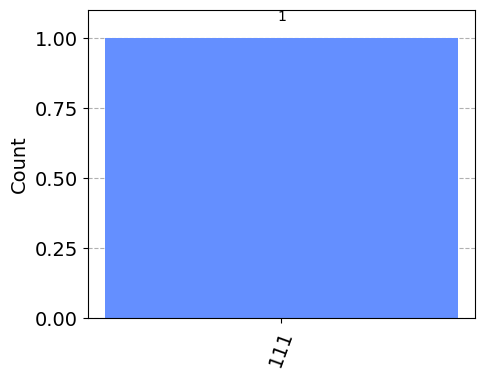

In [11]:
# execute the circuit defined above
nShots = 1

# perform constant_full_circuit just 1 time and plot the histogram of states!
res = execute(balanced_full_circuit, backend_qasm,shots=nShots).result()
counts = res.get_counts();
plot_histogram(counts, figsize=(5,4))


Is your result consistent with $f_b(x)$?

Given that the measured outcome is not the ket(0,0,0) state, this means the system is balanced and therefore consistent with the fb(x) values

# Problem 2: Simon's algorithm

## 2a: Implementing Simon's algorithm

### 2a (i): Define f(x)

Write a truth table for a binary function $f:\{0,1\}^2\rightarrow \{0,1\}^2$ that has the property $f(\mathbf{x}) = f(\mathbf{x} + \mathbf{s})$ for the binary bit string $\mathbf{s} = 10$

| $x$ | $$f(x)$$ |
| - | - |
| 00 | 10|
| 01 | 11|
| 10 | 00|
|11 | 01|

### 2a (ii): Define $U_f$

Write the truth table for the circuit that implments $U_f$ for Simon's problem. Note that for the function above, this is a 4 qubit unitary.

$$
U_f:|x\rangle|y\rangle\rightarrow |x\rangle|y\oplus f(x)\rangle
$$

For the second state is in $$|0\rangle = |00\rangle$$

| $x$ | $y$ | $$f(x)$$ | $$output$$ | 
| - | - | - | - |
| 00 | 00 | 10 | 0010 |
| 00 | 01 | 10 | 0011 |
| 00 | 10 | 10 | 0000 |
| 00 | 11 | 10 | 0001 |
| 01 | 00 | 11 | 0111 |
| 01 | 01 | 11 | 0110 |
| 01 | 10 | 11 | 0101 |
| 01 | 11 | 11 | 0100 |
| 10 | 00 | 00 | 1000 |
| 10 | 01 | 00 | 1001 |
| 10 | 10 | 00 | 1010 |
| 10 | 11 | 00 | 1011 |
| 11 | 00 | 01 | 1101 |
| 11 | 01 | 01 | 1100 |
| 11 | 10 | 01 | 1111 |
| 11 | 11 | 01 | 1110 |



### 2a (iii): Implement $U_f$ in Qiskit and draw the circuit

/Users/princetonwork/anaconda3/envs/pset_env/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


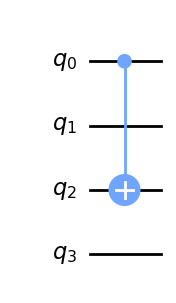

In [12]:
# Define the empty QuantumCircuit with 4 qubits
m=4
j = 2
q = QuantumRegister(m,'q')
s_oracle = QuantumCircuit(q)
# Implement the oracle circuit you described in 2a (ii)
s_oracle.cx(0,2)
# Draw
s_oracle.draw('mpl')

### 2a (iv): Implement the entire Simons algorithm in Qiskit and draw the circuit

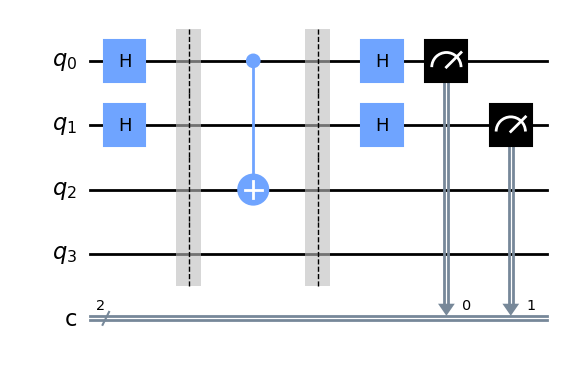

In [13]:
# Make the empty quantum circuit that has 4 qubits and 2 classical bits.
c = ClassicalRegister(2, 'c')
sc = QuantumCircuit(q, c)
# Apply Hadamard gates before querying the oracle
sc.h([0,1])
# Apply barrier for visual separation
sc.barrier()
# Add the oracle computation to the circuit. if c1 and c2 are both quantum circuits, you can append c2 to c1 using c1 += c2
# So, if you called your circuit in 2a (iii) 'oracle', and the circuit in this cell 'sc', this line would be sc += oracle
sc = sc.compose(s_oracle)
# Apply barrier for visual separation
sc.barrier()
# Apply Hadamard gates to the input register
sc.h([0,1])
# Measure qubits
for i in range(2):
    sc.measure(q[i],c[i])
# Draw
sc.draw('mpl')

### 2a (v): Show that the output gives the hidden string s = 10

{'01': 513, '00': 511}


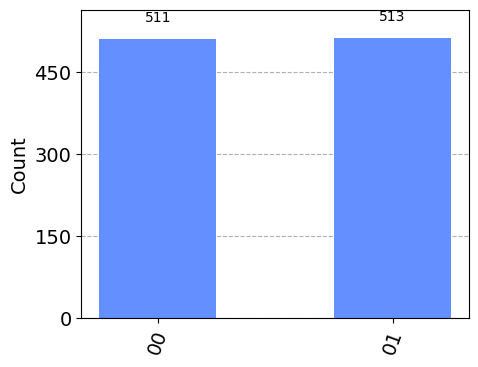

In [14]:
# Simulate your circuit (using the 'execute' function) using the simulator Aer.get_backend('qasm_simulator'). 1024 shots should be sufficient
shots = 1024
backend = Aer.get_backend("aer_simulator")
res = execute(sc, backend, shots = shots).result()
counts = res.get_counts()
print(counts)
# Get results using the .result().get_counts() functions
plot_histogram(counts, figsize=(5,4))
# Plot the histogram using the plot_histogram function


In [15]:
# The output of the .result.get_counts() function is a python dictionary, like the variable device_counts defined below.
# Note that you can retrieve the list of states in the above histogram using the .keys() function, as shown below:

device_counts = {'10': 519, '00': 505}
list(device_counts.keys())

['10', '00']

Show that these outputs give the hidden string $\mathbf{s}$ = 10 by showing the a dot product (mod 2) of all the recorded circuit outputs is 0. We have provided a helper function that will calculate the dot product for you. (**Remember, Qiskit reverses the ordering of the bits compared to the convention used in class.** One way to get around this is to compare the bit strings with the reverse of our known bit string. That is, take the dot product of each of the above states with the string '01')

In [16]:
# You may want to use the dot_mod_2() function defined at the top of this notebook
b = "10"
for z in counts: 
    print((b, z, dot_mod_2(b,z)))

('10', '01', 0)
('10', '00', 0)


## 2b: Find the hidden string

You should have a circuit that can solve Simon's problem for the specific 2-qubit oracle defined in part a. In part b, we will work with a 6-qubit oracle. You are given the circuit implementation of the oracle below. Your job is to make the circuit for Simon's algorithm using this 6-qubit oracle, and use the output of the algorithm to determine the 6-bit string hidden in this oracle

In [17]:
# The oracle is defined as follows
n = 6

x = QuantumRegister(n, 'x')
b = QuantumRegister(n, 'b')
oracle = QuantumCircuit(x, b)

for i in range(n):    
    oracle.cx(x[i], b[i])
    
for i in range(n):
    if i%2 == 1:
        oracle.cx(x[1], b[i])

### 2b (i): Implement the Simon's algorithm circuit with the above oracle and draw the circuit

/Users/princetonwork/anaconda3/envs/pset_env/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


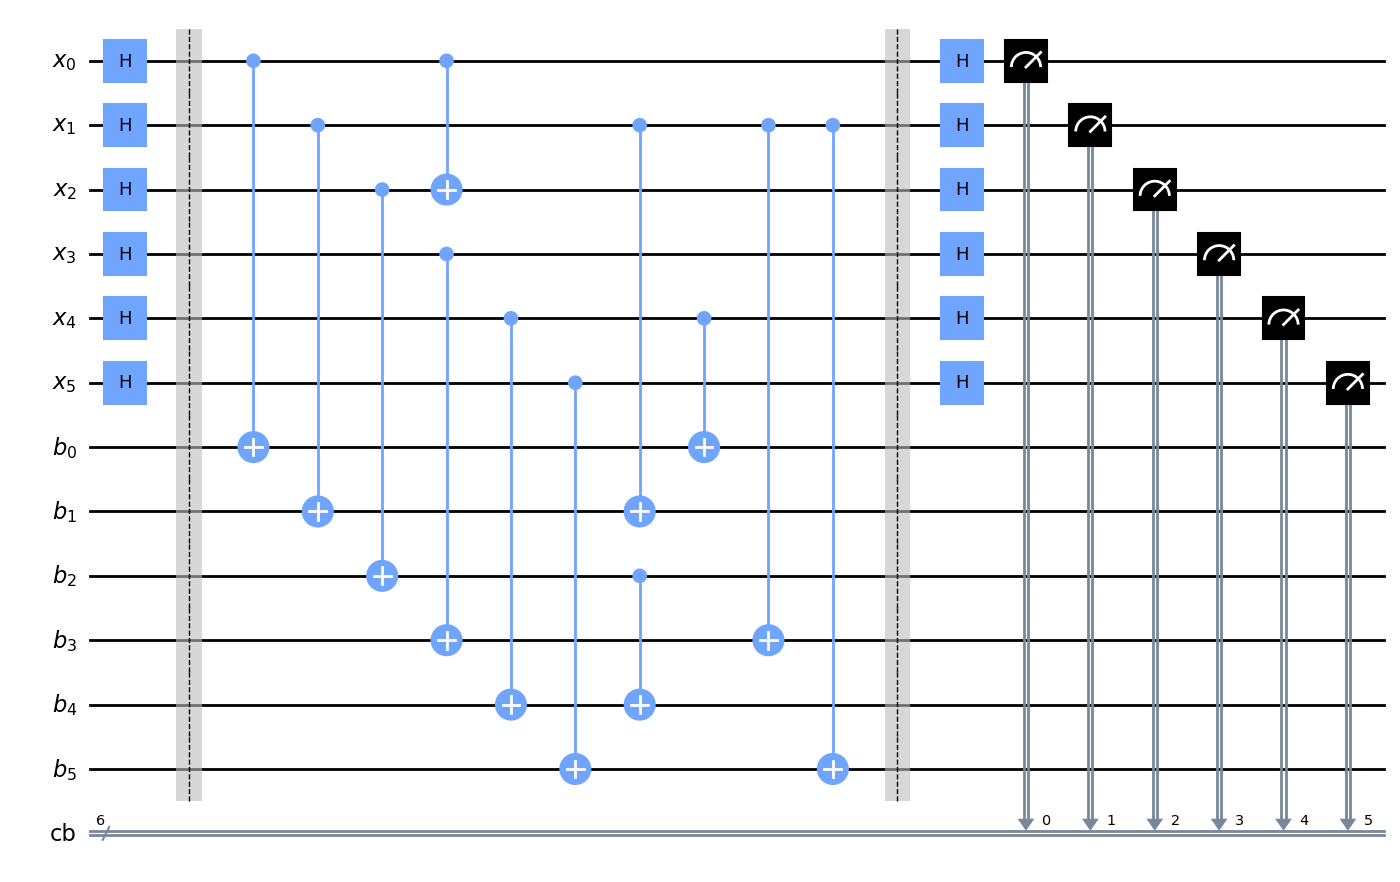

In [18]:
# Code to implement and draw the circuit. Make sure to draw the circuit to get credit!
c = ClassicalRegister(n,'cb')
full_circuit = QuantumCircuit(x,b,c)
for i in range(n):
    full_circuit.h(x[i])
full_circuit.barrier()
oracle.compose(s_oracle, qubits=[0,1,2,3],inplace=True)
oracle.compose(s_oracle,qubits=[4,5,6,7],inplace=True)
oracle.compose(s_oracle,qubits=[8,9,10,11],inplace=True)
full_circuit = full_circuit.compose(oracle)
full_circuit.barrier()
for i in range(n):
    full_circuit.h(x[i])
    full_circuit.measure(x[i],c[i])

full_circuit.draw('mpl')

### 2b (ii): Determine the hidden string


In [19]:
# Code to determing the hidden string (you can solve this using your code for problem 2b (iii), 
# but make sure to print your answer here to get credit)
def is_consistent(bitstring, outcomes):
    for outcome in outcomes:
        if dot_mod_2(bitstring,outcome) != 0:
            return False
        
    return True

def find_hidden_bitstring(outcomes, n):
    possible_bitstrings = [list(map(int, f"{i:0{n}b}")) for i in range(1,2**n)]

    consistent_bitstrings = []
    for bitstring in possible_bitstrings:
        if is_consistent(bitstring, outcomes):
            consistent_bitstrings.append(bitstring)
    
    if(len(consistent_bitstrings)) == 1:
        return consistent_bitstrings[0]
    else:
        return None
    
n = 6
Niterations = 500

outcome_list = []
for i in range(Niterations):
    simulator = execute(full_circuit,backend_qasm,shots=1)
    result = simulator.result()
    counts = result.get_counts(full_circuit)
    for outcome, count in counts.items():
        outcome_list.append([int(bit) for bit in outcome])

hidden = find_hidden_bitstring(outcome_list,n)
reversed_hidden = hidden[::-1]
if hidden is not None: 
    print("Hidden bitstring is: ", reversed_hidden)
else: 
    print("Collected outcomes are not sufficient to determine a unique hidden bitstring")


Hidden bitstring is:  [0, 1, 0, 1, 0, 1]


### 2b (iii) Estimate the average number of steps needed to determine the string (assume $\mathbf{s} \neq \mathbf{0}$)

To make this estimation, implement an algorithm of the following form:

1) Execute the circuit with a single-shot and record the outcome in a list.

2) Check if the collected outcomes is sufficient to determine the hidden bitstring.

3) If not sufficient, repeat steps 1) and 2).

4) Return the total number of executions


Apply this algorithm 500 times and average over the number of executions it took to find the hidden bitstring each time.

In [20]:
# Your code here
def one_shot(circuit):
    res = execute(circuit, backend_qasm, shots = 1).result()
    counts = res.get_counts(circuit)
    return counts

def average_steps(n,Niter, trials):
    total_steps = 0
    for trial in range(trials):
        outcome_list=[]
        found_hidden_bitstring = False
        steps = 0

    for i in range(Niterations):
        counts = one_shot(full_circuit)
        for outcome, count in counts.items():
            outcome_list.append([int(bit) for bit in outcome])
        hidden = find_hidden_bitstring(outcome_list,n)
        steps += 1
        if hidden is not None: 
            found_hidden_bitstring = True
            total_steps += steps
            break

    if not found_hidden_bitstring:
        total_steps += Niter
    
    average_steps = total_steps / trials
    return average_steps
        
n =6 
Niterations = 500
trials = 100
avg = 0
for j in range(trials):
    avg += average_steps(n, Niterations, trials)

avg_step = avg/trials*100
print(avg_step)






6.669999999999994


### 2b (iv): What is the theoretically minimum number of steps needed? (assume $\mathbf{s} \neq \mathbf{0}$)

According to Simon's Algorithm, you will need to query the oracle a linear number of times proportional to the number of input qubits, so six is the minimum number of steps.

####

# Problem 3: Implememtation of a 7-qubit Grover's algorithm

You might recall that in Grover's algorithm, you start with the initial state of $H^{\otimes n} |0\rangle^{\otimes n}$, which is an equal superposition of all the $2^n$ computational basis states ($H$ being the single-qubit Hadamard gate; $\otimes n$ indicating a tensor product of the states of all $n$ qubits). In this particular problem, we set $\textbf{n=7}$

Also, recall that owing to phase kickback, a controlled $U_{f(\vec{x})}$ gate acting on an ancilla qubit $|-\rangle$ and controled by the $n$-qubit state $|\vec{x}\rangle $ can be written as:
$$ |\vec{x}\rangle |-\rangle \xrightarrow{U_{f(\vec{x})}} (-1)^{f(\vec{x})}|\vec{x}\rangle |-\rangle$$ 
Therefore, in this problem, we will just ignore the ancilla qubit $|-\rangle$ entirely and work only with the $n$ qubits in the computational basis:
$$ U_{f(\vec{x})}: |\vec{x}\rangle \longrightarrow (-1)^{f(\vec{x})}|\vec{x}\rangle $$

<div>
<img src="attachment:Grover_sketch.png" width="500"/>
</div>

$\normalsize{\textbf{3a)}}$ Design a oracle that marks the $|0001000\rangle$ state (in the computational basis).

In other words, you will design a circuit on $n=7$ qubits that has computational states as its eigenstates, returns a $-1$ eigen value for the $|0001000\rangle$ state, and $+1$ eigen value for all other computational states.

$\textbf{Output}$: Draw the circuit

Hint: You may need to use the multi-controlled Toffoli gate or multi-controlled X gate; syntax: qc.mct([list of control qubits],target qubit)

/var/folders/69/mhz9bp956251805m7k2cn8br0000gn/T/ipykernel_9143/2127485380.py:15: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  orac_circ.mct([0,1,2,4,5,6],3)


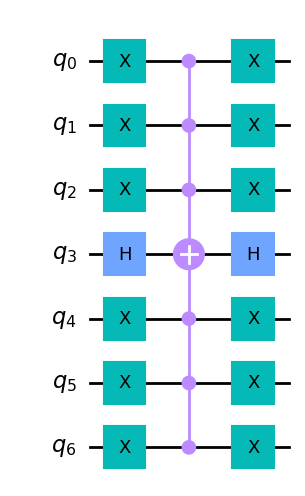

In [21]:
""" 3a"""

# store the final circuit in the parameter: orac_circ """
#########################
# Write your answer here
n = 7 
grover = QuantumRegister(n,'q')
orac_circ = QuantumCircuit(grover)
for i in range(n):
    if i != 3:
        orac_circ.x(i)
    elif i == 3:
        orac_circ.h(i) 

orac_circ.mct([0,1,2,4,5,6],3)
orac_circ.h(3)

for i in range(n):
    if i != 3:
        orac_circ.x(i)
#########################

orac_circ.draw('mpl')

$\normalsize{\textbf{3b)}}$ Construct a 7-qubit diffusion operator for Grover's algorithm

$\textbf{Output}$: Draw the circuit

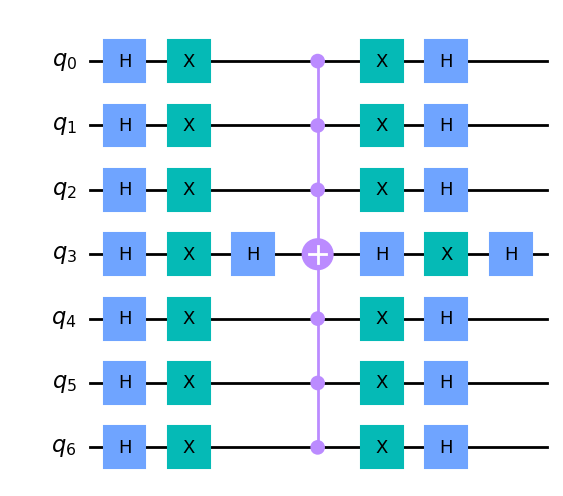

In [22]:
""" 3b"""

# store the final circuit in the parameter: diff_circ """
#########################
# Write your answer here
diff_circ = QuantumCircuit(grover)
for i in range(n):
    diff_circ.h(i)
    if i ==3:
        diff_circ.x(i)
diff_circ = diff_circ.compose(orac_circ)
for i in range(n):
    if i ==3:
        diff_circ.x(i)
    diff_circ.h(i)
    
#########################

diff_circ.draw('mpl')

$\normalsize{\textbf{3c)}}$ Putting everything together: initialize qubits appropriately, add $\textbf{a single instance}$ of the oracle and the diffusion operator, insert measurement operators, and execute the circuit.

$\textbf{Output}$: Draw the circuit and plot the histogram of counts

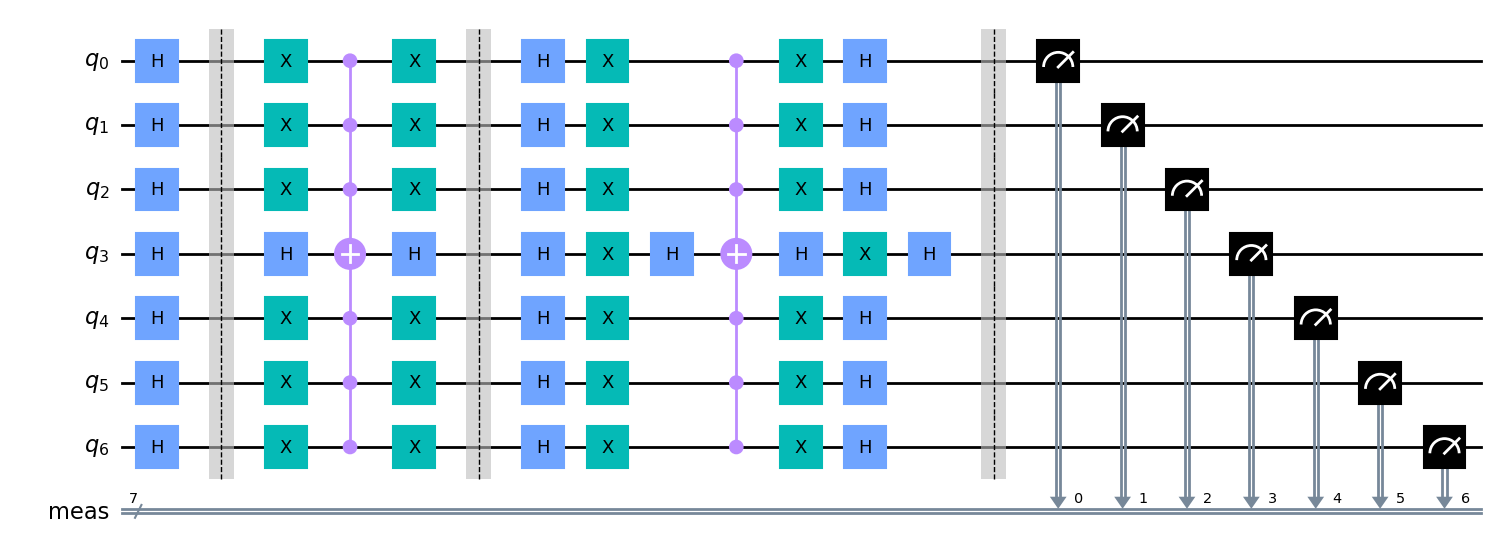

In [23]:
""" 3c - draw the circuit """

# store the final circuit in the parameter: grov_circ """
#########################
# Write your answer here
grov_circ = QuantumCircuit(grover)
for i in range(n):
    grov_circ.h(i)
grov_circ.barrier()
grov_circ = grov_circ.compose(orac_circ)
grov_circ.barrier()
grov_circ = grov_circ.compose(diff_circ)
grov_circ.measure_all()

#########################

grov_circ.draw('mpl')

0.070037841796875


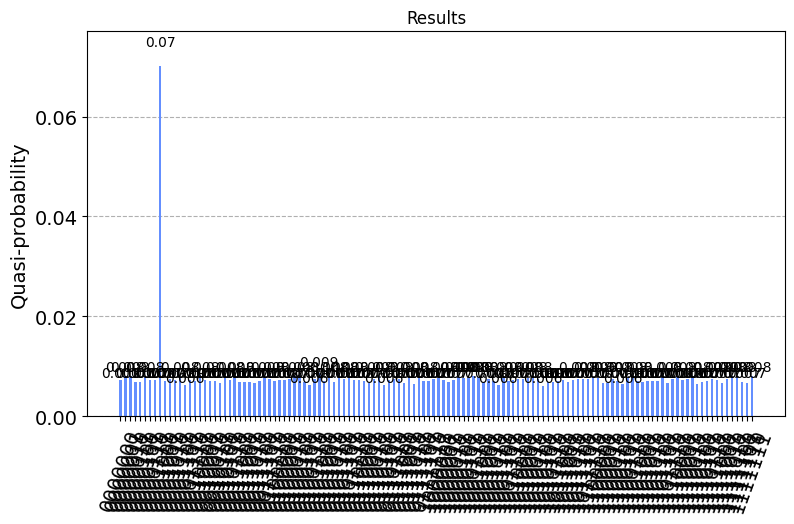

In [24]:
""" 3c - plot the histogram of results """

# You may execute the code for a decent nubmers of "shots"; something like 2**15 should be good

#########################
# Write your answer here
Nshots = 2**15
res = execute(grov_circ, backend_qasm, shots=Nshots).result()
data = res.get_counts()
total_shots = sum(data.values())
normalized_data = {state: data / total_shots for state, data in data.items()}

test = normalized_data.get('0001000')
print(test)
plot_histogram(normalized_data,figsize=(9,5), title="Results")
#########################


$\normalsize{\textbf{3d)}}$ Compute the probability of measuring the marked state from the analytical expression (for a single instance of Grover's oracle & diffusion operator). Does the numerically extracted value (from prob. 2c) agree with the analytically computed value? From the analytical expression, estimate the number of repititions of the Grover's oracle & diffusion operator needed to maximize the probability of measuring the marked state.

In [25]:
""" 3d"""

#########################
# Write your answer here

analytic_val = 0.07
numeric_val = 0.07 
number_of_repeat = 8 ## Maximize when sin^2((2t+1)/(2^6)^1/2)) when inside equals pi/2

print("Analytically est. prob. of measuring the marked state: ", analytic_val )
print("Numerically est. prob. of measuring the marked state: ",  numeric_val )
print("Num. of repetitions needed to maximize prob. of measuring the marked state: ", number_of_repeat )

#########################


Analytically est. prob. of measuring the marked state:  0.07
Numerically est. prob. of measuring the marked state:  0.07
Num. of repetitions needed to maximize prob. of measuring the marked state:  8


The numerically extraced value does agree with the analytically computed value, because the formula of success is the following: $\\{P}(success)=\sin^2(\frac{2t+1}{\sqrt(N)})$ where t is the number of iterations and $\textnormal{N}=2^n$ is the number of input qubits. For our case $\sqrt{N}=\sqrt{2^7}=\sqrt{128}\quad \textnormal{and}\quad t=1\rightarrow{P}(success)=\sin^2(\frac{3}{\sqrt{128}})$ gives you the numerical est. probability after one iteration. 


To calculate the number of repetition needed to maximized the probability you set the argument of the probability function equal to it's maximizing value, which for a sine function is at $\theta=\frac{\pi}{2}$, so $\frac{2t+1}{\sqrt{N}}=\frac{\pi}{2}\rightarrow\quad t=\frac{\frac{\pi}{2}\sqrt{N}-1}{2}$, which for our case is about 8 iterations. 

$\normalsize{\textbf{3e)}}$ Numerically evalute the probability of measuring the marked state as a function of the number of reptitions of Grover's oracle & diffusion operator. Vary the number of repetions from 0 to 20. You might want to start from prob. 2c and add multiple instances of the oracle and diffusion operator. Also, compare your numerical results to the oscillatory behavior expected from the analytical expression.

$\textbf{Output}$: A 2D plot of the probability vs. the numbers of repetitions. Also, overlay a 2D plot of analytically evaluated probability.

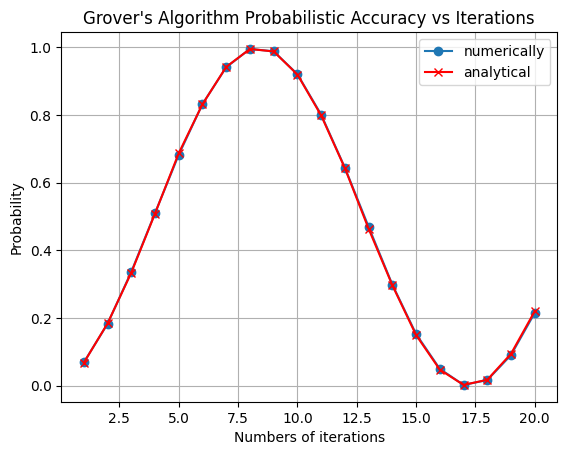

In [26]:
""" 3e """

# You may execute the code for a decent nubmers of "shots"; something like 2**15 should be good
from matplotlib import pyplot as plt
#########################
# Write your answer here
n = 7
iterations = 20
x = np.arange(1, 1+iterations)
prob = np.zeros(iterations)
Nshots = 2**15

def add_circ(circ_name):
    circ_name = circ_name.compose(orac_circ)
    circ_name.barrier()
    circ_name = circ_name.compose(diff_circ)
    return circ_name

j = 0
## Iterating over the circuits 
grov_circ = QuantumCircuit(grover)
grov_circ.h(range(n))

while (j < iterations): 
    grov_circ = add_circ(grov_circ)

    temp_circ = grov_circ.copy()
    temp_circ.measure_all()

    res = execute(temp_circ, backend_qasm, shots=Nshots).result()
    data = res.get_counts()
    total_shots = sum(data.values())
    normalized_data = {state: data / total_shots for state, data in data.items()}

    prob[j] = normalized_data.get('0001000')
    j +=1


y1 = np.sin((2*x+1)/np.sqrt(2**n))**2  


plt.plot(x,y1, label='numerically', marker ='o')
plt.plot(x,prob, label = 'analytical', color='red',marker='x')
plt.title("Grover's Algorithm Probabilistic Accuracy vs Iterations")
plt.xlabel("Numbers of iterations")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)

#########################
